[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.5943312.svg)](https://doi.org/10.5281/zenodo.5943312)


# Supplemental Code: "Material Culture Studies in the Age of Big Data: Digital Excavation of Homemade Facemask Production during the COVID-19 Pandemic"

The code and data in this repository can be used to reproduce the analysis from [Magnani, Clindaniel, and Magnani (2022) "Material Culture Studies in the Age of Big Data: Digital Excavation of Homemade Facemask Production during the COVID-19 Pandemic."](https://doi.org/10.1017/aaq.2022.58)

The code is written in Python 3.9.7 and all of its dependencies can be installed by running the following in the terminal (with the `requirements.txt` file included in this repository):

In [1]:
pip install -r requirements.txt

Then, we can import the `etsy` module located in this repository to reproduce the analysis in the article (in a Jupyter Notebook, like `README.ipynb` in this repository, or in any other Python script):

In [2]:
import etsy

We can use the `process_data` function in the `etsy` module to process each mask product listing into its constituent tokens and lemmas. Note that `process_data` also produces a `geopandas` dataframe of state boundary polygon information that can be used to visualize aggregate measures of these masks across the U.S.:

In [3]:
df, states = etsy.process_data()
df[['state', 'lemmas', 'tokens']].tail()

,state,lemmas,tokens
10956,Wyoming,"[funky, rainbow, star, cover, glitter, comfort...","[funky, facemask, rainbow, stars, face, coveri..."
10957,Wyoming,"[adult, size, cover, purple, bird, dust, allergy]","[adult, size, face, cover, purple, birds, dust..."
10958,Wyoming,"[chic, gold, satin, white, cursive, text]","[chic, gold, satin, face, mask, with, white, c..."
10959,Wyoming,"[adult, nose, wire, built, filter, bee]","[face, mask, face, mask, for, adults, mask, wi..."
10960,Wyoming,"[chic, satin, black, cursive, text]","[chic, satin, face, mask, with, black, cursive..."


Included in the `etsy` module are lists of the keywords that we used in the article to identify products with material characteristics that are "intentionally effective" (i.e. following CDC guidelines), those that are indicative of "intentionally ineffective" material characteristics (anti-mask production), and finally a list of potentially "unintentionally ineffective" material characteristics. Note that the lists include both multi-word combinations ("bigrams") as well as single word tokens.

In [4]:
print("########## Intentionally Effective ##########")
print(etsy.intentionality_eff)

print("########## Intentionally Ineffective ##########")
print(etsy.intentionality_ineff)

print("########## Unintentionally Ineffective ##########")
print(etsy.unintentionality_ineff)

########## Intentionally Effective ##########
[('two', 'layer'), ('double', 'layer'), ('2', 'layer'), ('three', 'layer'), ('triple', 'layer'), ('3', 'layer'), ('multi', 'layer'), ('multiple', 'layer'), 'multilayer', 'multilayered', 'upf', 'uv', 'thick', 'cotton', ('adjustable', 'fit'), ('form', 'fit'), ('snug', 'fit'), ('tight', 'fit'), ('nose', 'wire'), ('cover', 'chin'), ('cover', 'nose'), ('cover', 'mouth'), ('filter', 'pocket'), 'cotton', 'kn95', 'n95']
########## Intentionally Ineffective ##########
['mesh', 'crochet', 'yarn', 'lace', 'hole', ('one', 'layer'), ('single', 'layer'), ('1', 'layer'), 'compliance', 'antimask', ('anti', 'mask'), 'protest']
########## Unintentionally Ineffective ##########
['valve', 'thin', 'loose']


Using these lists of material characteristics, we can then compute the percentage of products made in a given state that had material characteristics from our lists of keywords using the `pct_match` function in the `etsy` module. For instance, we can see that around 42% of the masks made in Alabama had material characteristics that were "intentionally effective," whereas around 74% of the masks made in California had these material characteristics:

In [5]:
etsy.pct_match(etsy.intentionality_eff, df, groupby='state').head()

state
Alabama       41.545894
Alaska        38.775510
Arizona       66.222222
Arkansas      47.887324
California    74.180328
Name: match, dtype: float64

We can also visualize these percentages on a U.S. map using the `plot_pct_by_state` function in the `etsy` module. Note that this is a time-averaged representation of these percentages over our study period (July 25, 2020 through May 10, 2021).

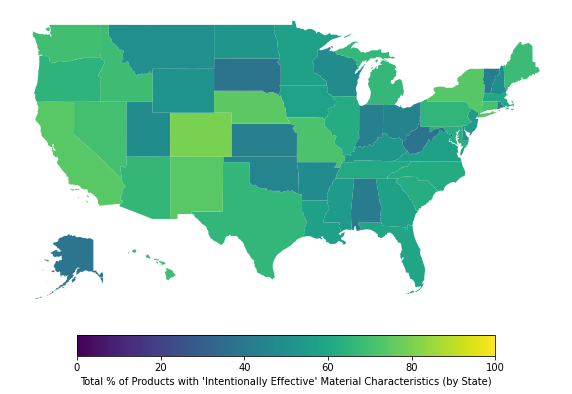

In [6]:
etsy.plot_pct_by_state(etsy.pct_match(etsy.intentionality_eff, df, groupby='state'),
                       "'Intentionally Effective' Material Characteristics",
                       shp_df=states)

To interpret how these percentages changed over time, we can use the `plot_pct_by_state_date` function in the `etsy` module:

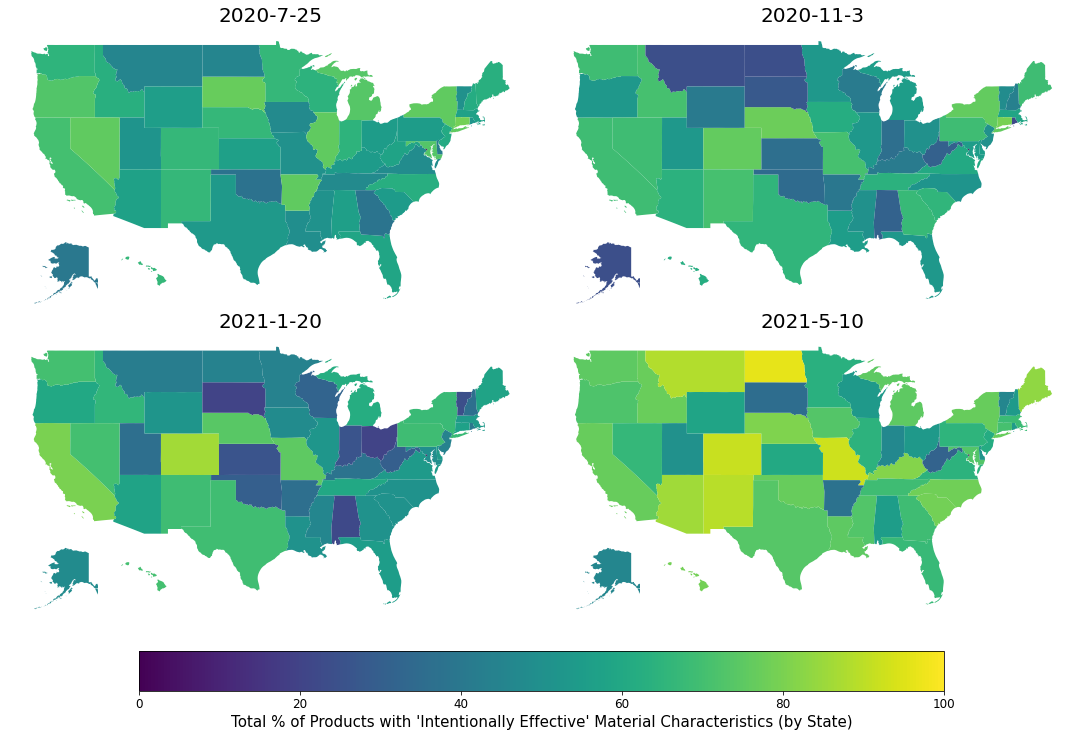

In [7]:
int_eff_state_date = etsy.pct_match(etsy.intentionality_eff, df, groupby=['state', 'date_collected'])
etsy.plot_pct_by_state_date(int_eff_state_date,
                            "'Intentionally Effective' Material Characteristics",
                            shp_df=states)

If we then want to interpret whether voting patterns are related to the use of certain material characteristics, we can visually compare our maps above to a state-level electoral map of the 2020 U.S. presidential election:

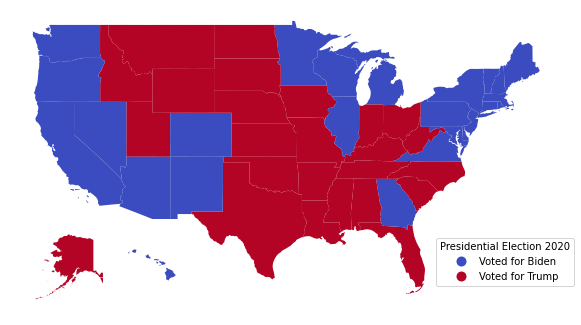

In [8]:
etsy.plot_2020_electoral_map(states)

Alternatively, we can filter states by the 2020 presidential candidate who carried each state (provided in the `etsy` module) and use the `plot_pct_by_vote` function to directly compare the material characteristics of masks in Trump-voting states versus those that voted for Biden:

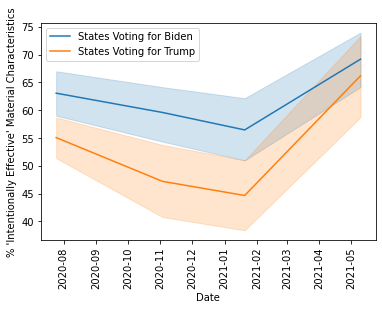

In [9]:
biden = int_eff_state_date.loc[etsy.biden]
trump = int_eff_state_date.loc[etsy.trump]

etsy.plot_pct_by_vote(biden, trump, "'Intentionally Effective' Material Characteristics")

Doing the same for the other term lists analyzed in the article follows the same workflow:

## Intentionally Ineffective Material Characteristics

Note that, for the "intentionally ineffective" term list, we exclude any products that mention "black lives matter" in their mask descriptions in computing state percentage matches for "intentionally ineffective" material characteristics. We do this because we found that it was deceptive to search for "protest" masks (e.g. material characteristics that went against mask mandates), when the word "protest" was also commonly used to describe otherwise effective masks that had "Black Lives Matter" designs on them. 

We also included stopwords in this analysis (`stopwords=False`). For other analyses, we used "mask" as a custom stopword (because it appears in nearly all of the product descriptions). However, in order to identify the bigram "anti-mask" or "anti mask" we set the stopwords parameter to `False` to identify products that prefaced the word "mask" with "anti."

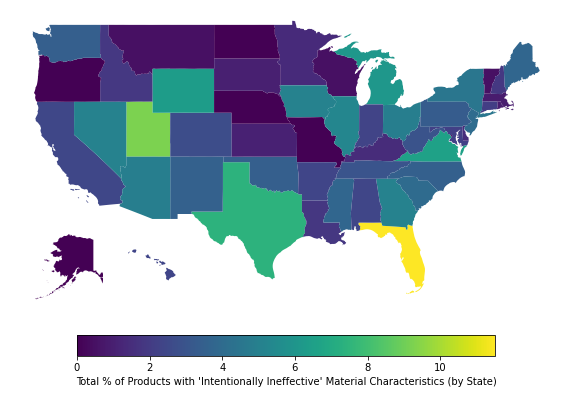

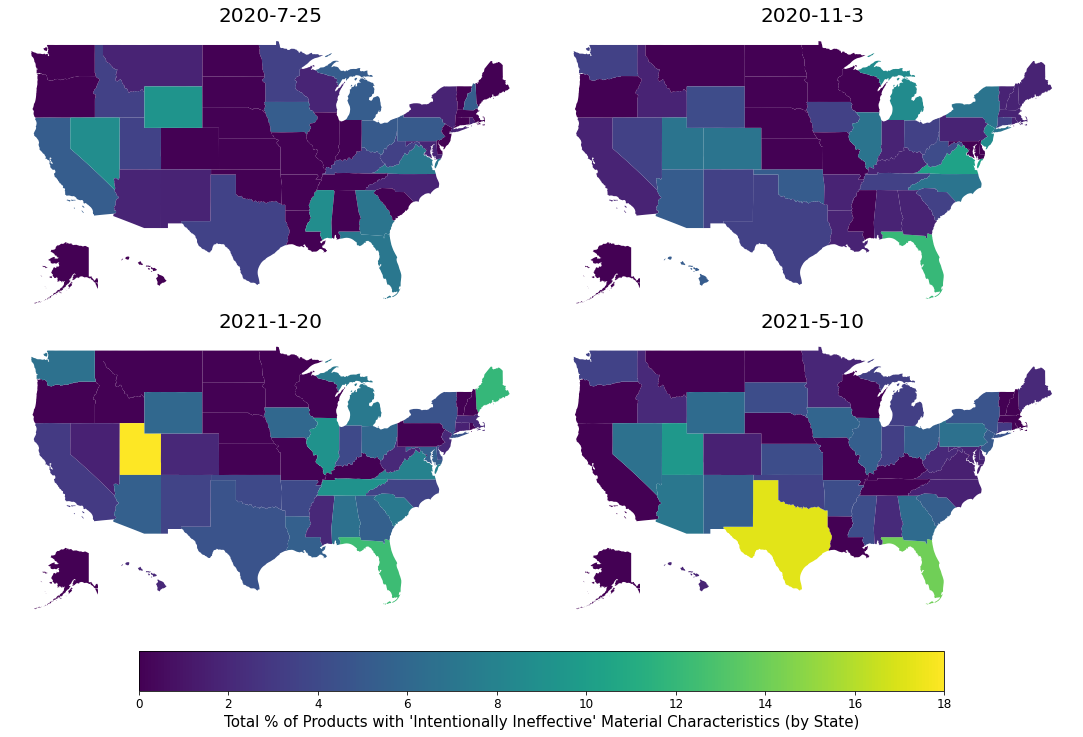

In [10]:
etsy.plot_pct_by_state(etsy.pct_match(etsy.intentionality_ineff, df, groupby='state',
                                    stopwords=False, exclude=['black lives matter']),
                       "'Intentionally Ineffective' Material Characteristics", shp_df=states,
                       scale=True)

etsy.plot_pct_by_state_date(etsy.pct_match(etsy.intentionality_ineff, df,
                            groupby=['state', 'date_collected'],
                            stopwords=False, exclude=['black lives matter']),
                            "'Intentionally Ineffective' Material Characteristics", shp_df=states,
                            scale=True)

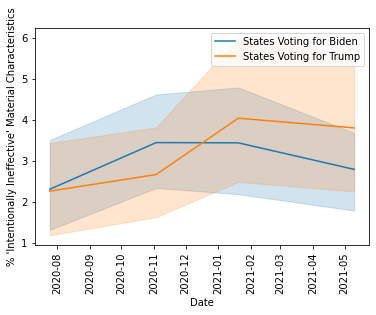

In [11]:
biden = etsy.pct_match(etsy.intentionality_ineff, df, groupby=['state','date_collected'],
                       stopwords=False, exclude=['black lives matter']).loc[etsy.biden]
trump = etsy.pct_match(etsy.intentionality_ineff, df, groupby=['state','date_collected'],
                       stopwords=False, exclude=['black lives matter']).loc[etsy.trump]

etsy.plot_pct_by_vote(biden, trump, "'Intentionally Ineffective' Material Characteristics")

Narrowing in on a couple of keywords in intentionally ineffective material characteristics ("mesh" and "anti-mask"), we can identify patterns with more granularity. Note that we can use the `scale` parameter to scale the color bar by the maximum percentage in the plot (making characteristics that appear infrequently more visible):

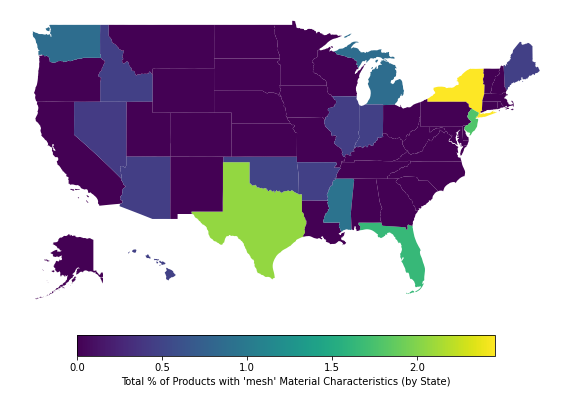

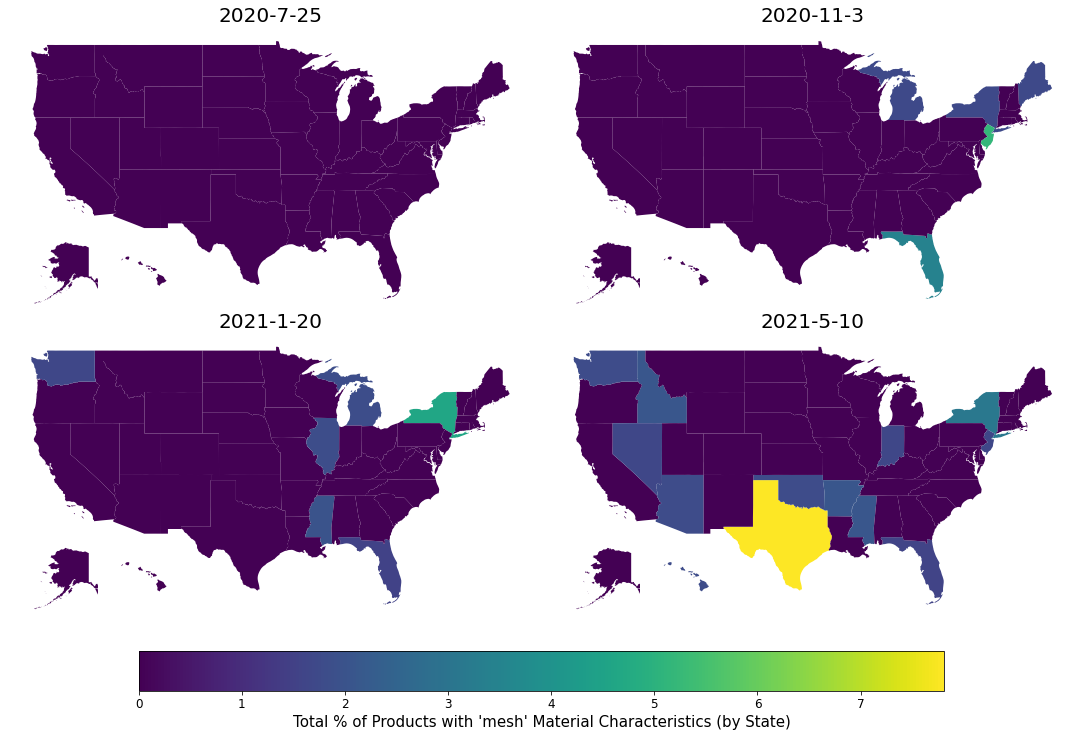

In [12]:
etsy.plot_pct_by_state(etsy.pct_match(etsy.mesh, df, groupby='state',
                                      stopwords=False),
                       "'mesh' Material Characteristics", shp_df=states,
                       scale=True)

etsy.plot_pct_by_state_date(etsy.pct_match(etsy.mesh,
                                 df, groupby=['state', 'date_collected'], stopwords=False),
                            "'mesh' Material Characteristics",
                            shp_df=states, scale=True)

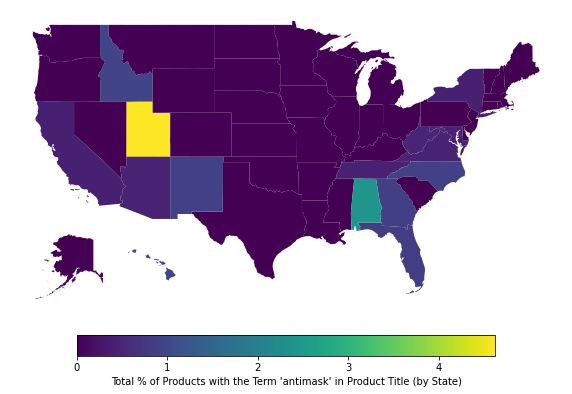

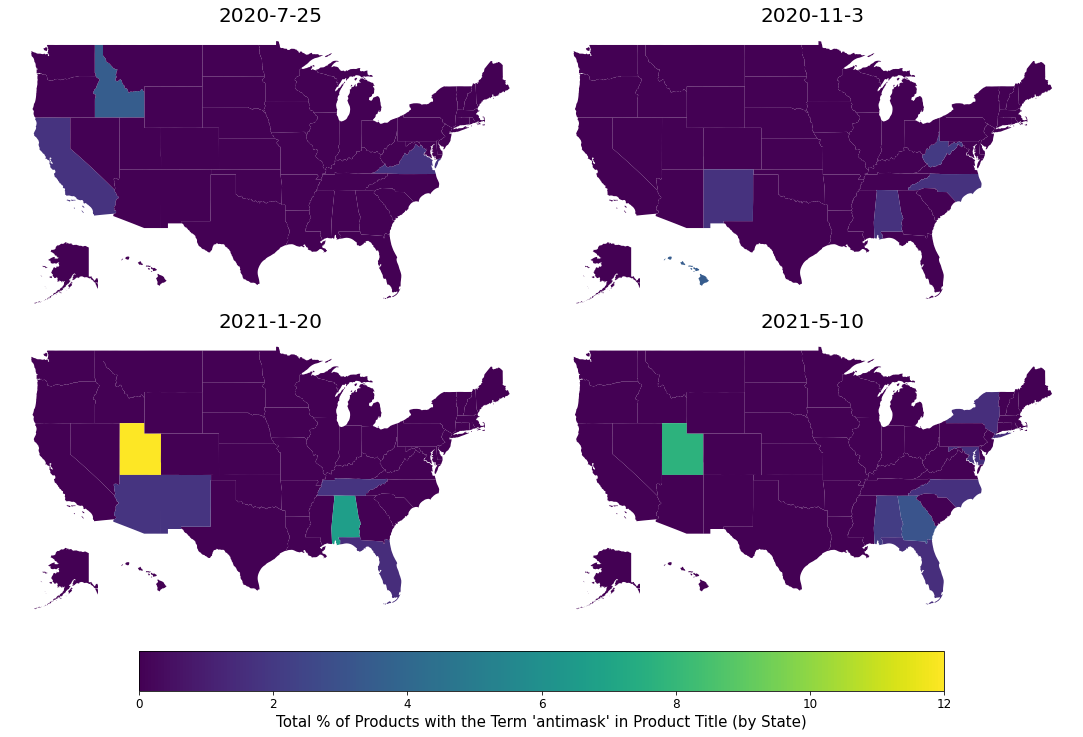

In [13]:
etsy.plot_pct_by_state(etsy.pct_match(etsy.antimask, df, groupby='state',
                                      stopwords=False),
                       "the Term 'antimask' in Product Title", shp_df=states,
                       scale=True)

etsy.plot_pct_by_state_date(etsy.pct_match(etsy.antimask,
                                           df, groupby=['state', 'date_collected'], stopwords=False),
                            "the Term 'antimask' in Product Title",
                            shp_df=states, scale=True)

## Unintentionally Ineffective Material Characteristics

Finally, taking a look at material characteristics that were potentionally "Unintentionally Ineffective" (e.g. "valves"):

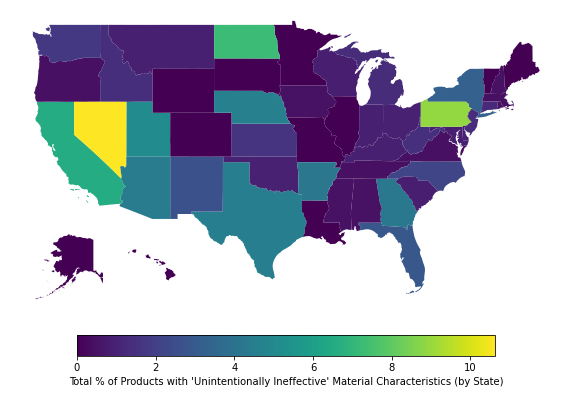

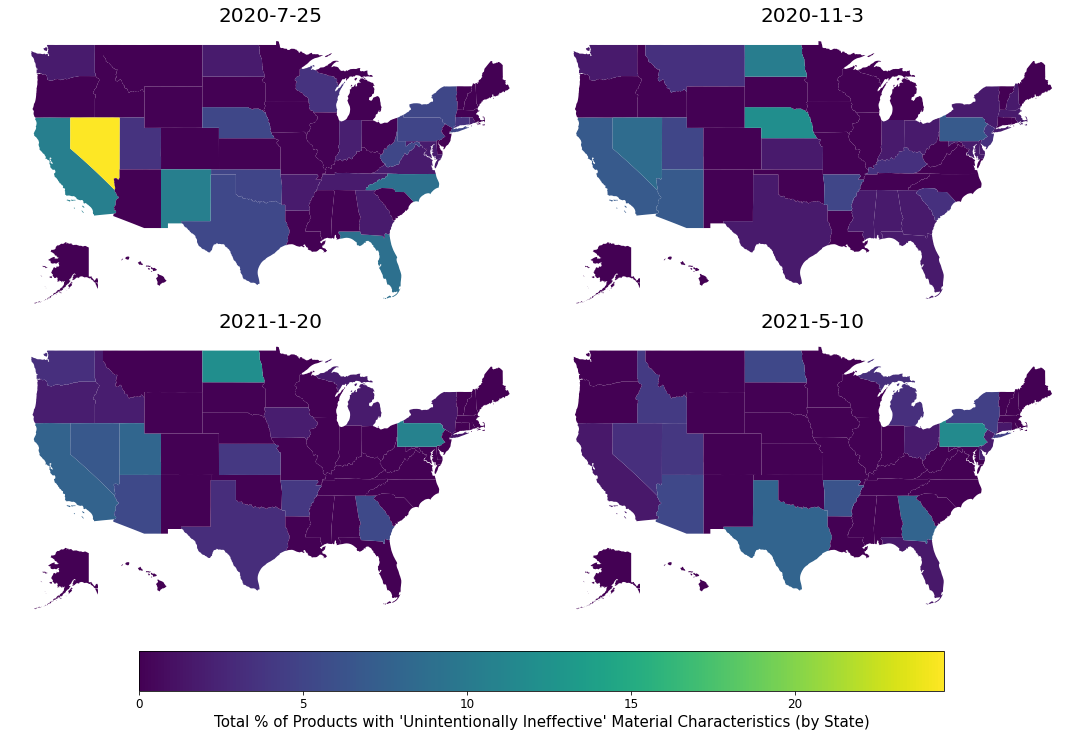

In [14]:
etsy.plot_pct_by_state(etsy.pct_match(etsy.unintentionality_ineff,
                                df, groupby='state'),
                       "'Unintentionally Ineffective' Material Characteristics",
                       shp_df=states, scale=True)

etsy.plot_pct_by_state_date(etsy.pct_match(etsy.unintentionality_ineff,
                                 df, groupby=['state', 'date_collected']),
                       "'Unintentionally Ineffective' Material Characteristics",
                       shp_df=states, scale=True)

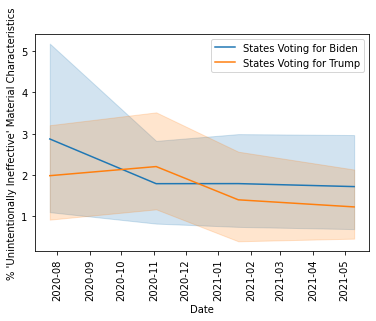

In [15]:
biden = etsy.pct_match(etsy.unintentionality_ineff,
                       df, groupby=['state','date_collected']).loc[etsy.biden]
trump = etsy.pct_match(etsy.unintentionality_ineff,
                       df, groupby=['state','date_collected']).loc[etsy.trump]

etsy.plot_pct_by_vote(biden, trump, "'Unintentionally Ineffective' Material Characteristics")